<a href="https://colab.research.google.com/github/JeffreyAsuncion/TF_MLF_GoogleDev/blob/master/4_UsingConvolutions/TF4b_Exercise_3_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [ ]:
import tensorflow as tf


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>.998):
            print("\n\nReached > 99.8% accuracy so cancelling training!")
            self.model.stop_training = True

# Instaniate myCallback
callbacks = myCallback()

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# reshape into a 4D array and normalize
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0


# Build model with one convolutinal and MaxPool
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# setup the optimizer and the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

# cal loss for test set
test_loss = model.evaluate(test_images, test_labels)


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1362 - accuracy: 0.9595
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0479 - accuracy: 0.9854
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9906
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9958
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - accuracy: 0.9965
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0062 - accuracy: 0.9977
Epoch 9/20
1868/1875 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9987

Reached > 99.8% accu

IndexError: ignored

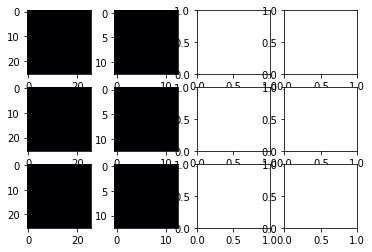

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)